In [21]:
#importing libraries to use
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
df_credit_card =  pd.read_csv("CC GENERAL.csv")

# A quick glimpse about the dataset

In [3]:
#displaying the first 5 rows of the dataset
df_credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#displaying the last 5 rows of the dataset
df_credit_card.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
#getting the statistical analysis for our features
df_credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


the above statistical analysis show a broad range of financial behaviors, with certain features like 'Balance', 'Purchases', and 'Cash Advance' indicating substantial variability among the customers. There are indications of both small, frequent transactions and less frequent, larger ones. The presence of high standard deviations across many of these features suggests significant difference in the financial behavior of the dataset's subjects. This could imply a need for segmentation or stratification in further analysis to better understand the different behaviors within the dataset.

In [7]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

We can see that we have only one feature(CUST_ID) which is of object datatype, the other 17 features are floats and integers datatype, and also we have 8950 data points in total.

In [6]:
#remove Cust_ID column, we don't need it for the analysis
df_credit_card=df_credit_card.drop('CUST_ID',axis=1)

# Exploatory Data Analysis

In [7]:
#checking for missing values
df_credit_card.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can see that we only one feature (minimum_payments) has quite a huge number of missing values in our dataset, and the credit limit feature with only 1 missing value. we will explore later on how to handle those missing values

# Handling missing values

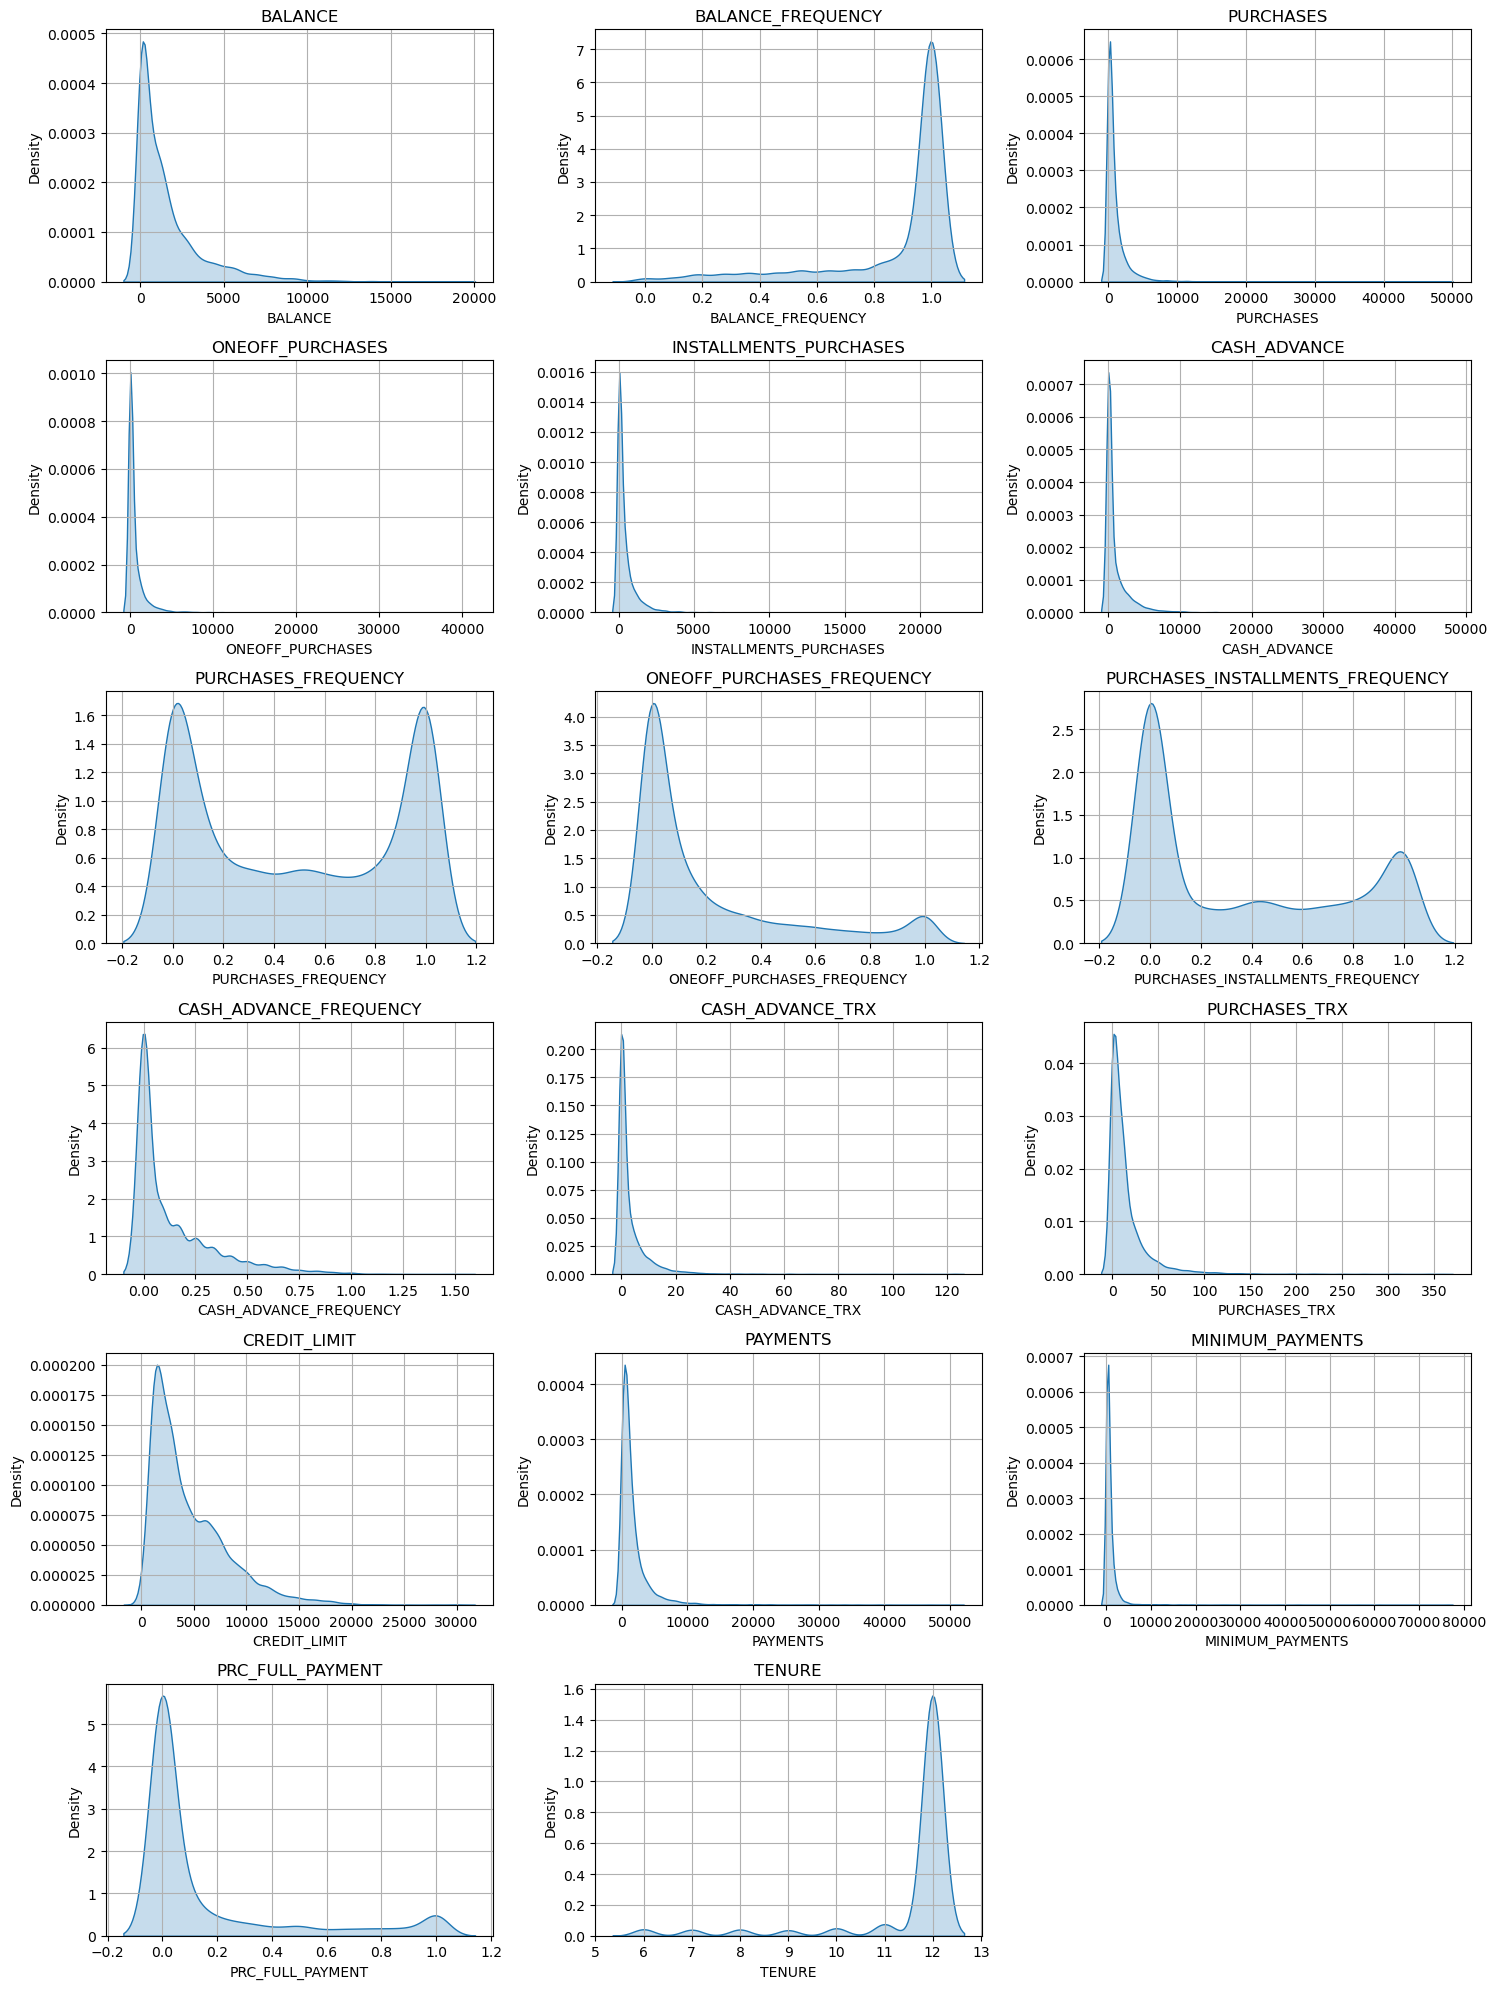

In [30]:
#check the distribution of the dataset before handling missing values
r = 6
c = 3
it = 1

# Set the figure size to ensure that each subplot is large enough to be legible
plt.figure(figsize=(15, 20))

# Iterate over each column in the DataFrame, but only for numeric data
for i in df_credit_card.select_dtypes(include=[np.number]).columns:
    plt.subplot(r, c, it)
    # Plot the KDE for the current column
    sns.kdeplot(df_credit_card[i], shade=True)
    plt.title(i)  # Add a title to each subplot for clarity
    plt.grid()  # Add grid to the plot for better readability
    it += 1

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

In [8]:
#for credit limit there is only one value missing , let's drop that row as it won't affect our data
df_credit_card.dropna(subset = ['CREDIT_LIMIT'], inplace=True)

In [9]:
#drop missing values and see the distribution after droping them
df_credit_card = df_credit_card.dropna()

In [10]:
df_credit_card.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

NO missing value for now

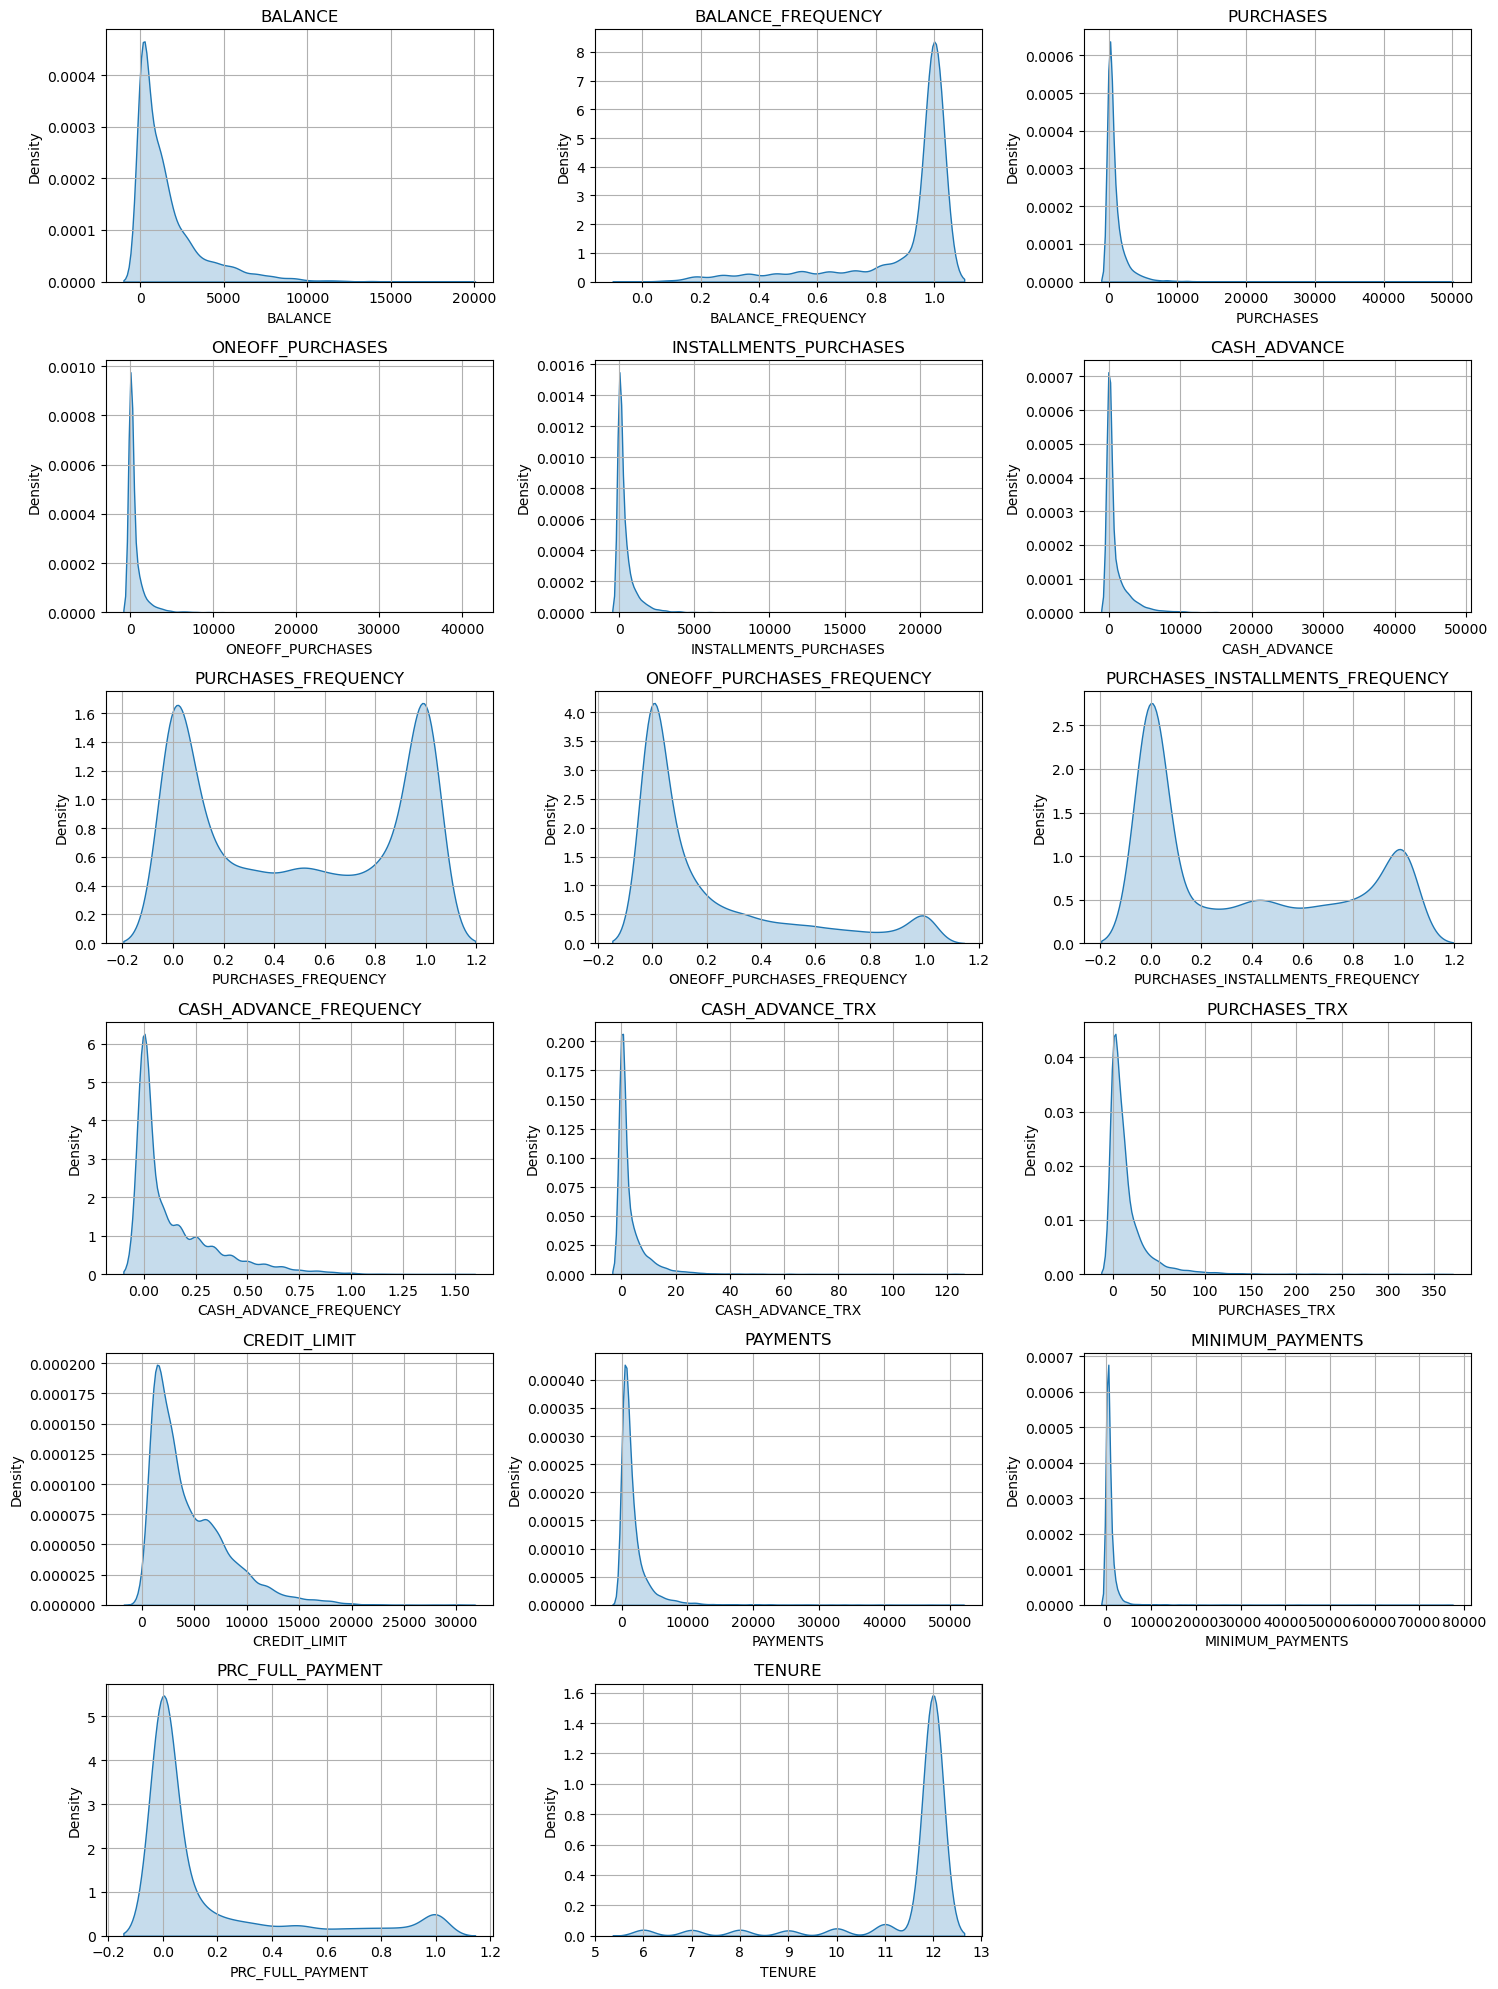

In [33]:
#check the distribution of the dataset before handling missing values
r = 6
c = 3
it = 1

# Set the figure size to ensure that each subplot is large enough to be legible
plt.figure(figsize=(15, 20))

# Iterate over each column in the DataFrame, but only for numeric data
for i in df_credit_card.select_dtypes(include=[np.number]).columns:
    plt.subplot(r, c, it)
    # Plot the KDE for the current column
    sns.kdeplot(df_credit_card[i], shade=True)
    plt.title(i)  # Add a title to each subplot for clarity
    plt.grid()  # Add grid to the plot for better readability
    it += 1

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

We can see that the distribution for minimum payments even after droping the null values stays the same

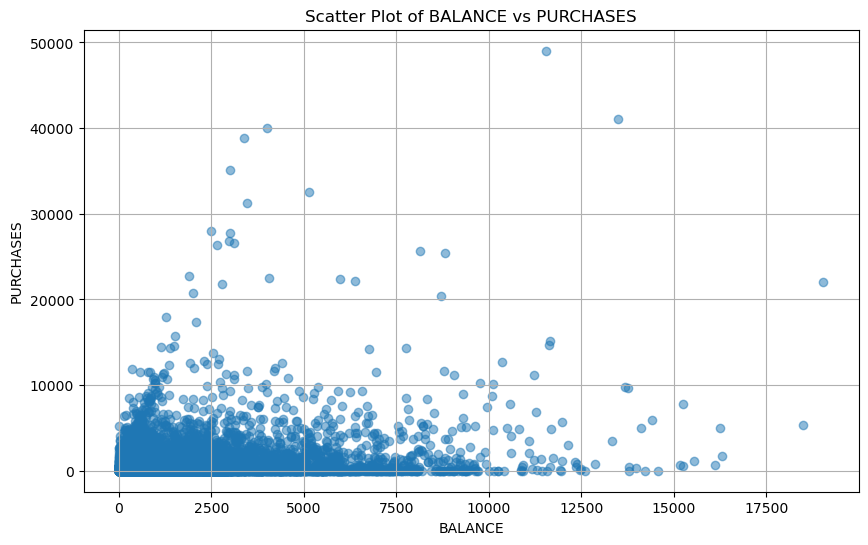

In [38]:
#scatter plot to show the correlation between different variable

# Function to create a scatter plot
def plot_scatter(df, x_variable, y_variable):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_variable], df[y_variable], alpha=0.5)
    plt.title(f'Scatter Plot of {x_variable} vs {y_variable}')
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.grid(True)
    plt.show()

# Call the function with the dataframe and the two variables of interest
plot_scatter(df_credit_card, 'BALANCE', 'PURCHASES')

we can infer the following from the above plot:

1. there is a high concentration of points near the origin, indicating that a significant number of customers have low balances and make low to moderate purchases.
2. As the balance increases, the number of purchases also tends to increase, but not as uniformly. 
3. There are a few points (which can be taken as outliers) far from the main cluster, particularly in the top right corner, which suggest that some customers with very high balances make very high purchases. 
4. The overall trend appears to be that as balance increases, purchases also tend to increase. However, the relationship does not seem to be strong or linear, as there are many customers with high balances who do not make correspondingly high purchases.

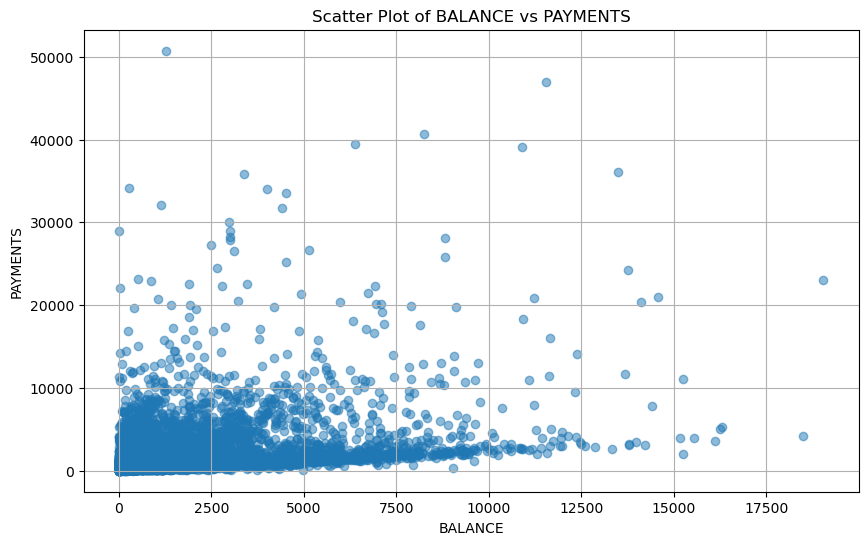

In [39]:
plot_scatter(df_credit_card, 'BALANCE', 'PAYMENTS')

From the above graph we can say that:
1. Most of the data points are clustered at the lower end of the balance spectrum. This suggests that most customers have lower balances and make smaller payments.
2. here are a few points with a high balance and high payments, far from the main cluster, indicating that there are some customers who maintain high balances and correspondingly make high payments.
3. For any given balance, there is a wide range of payments, suggesting variability in how customers choose to pay off their balances. 
4. There are also some customers with low balances making relatively high payments, which could indicate customers who are actively paying down their balances or who prefer to keep their balances low.

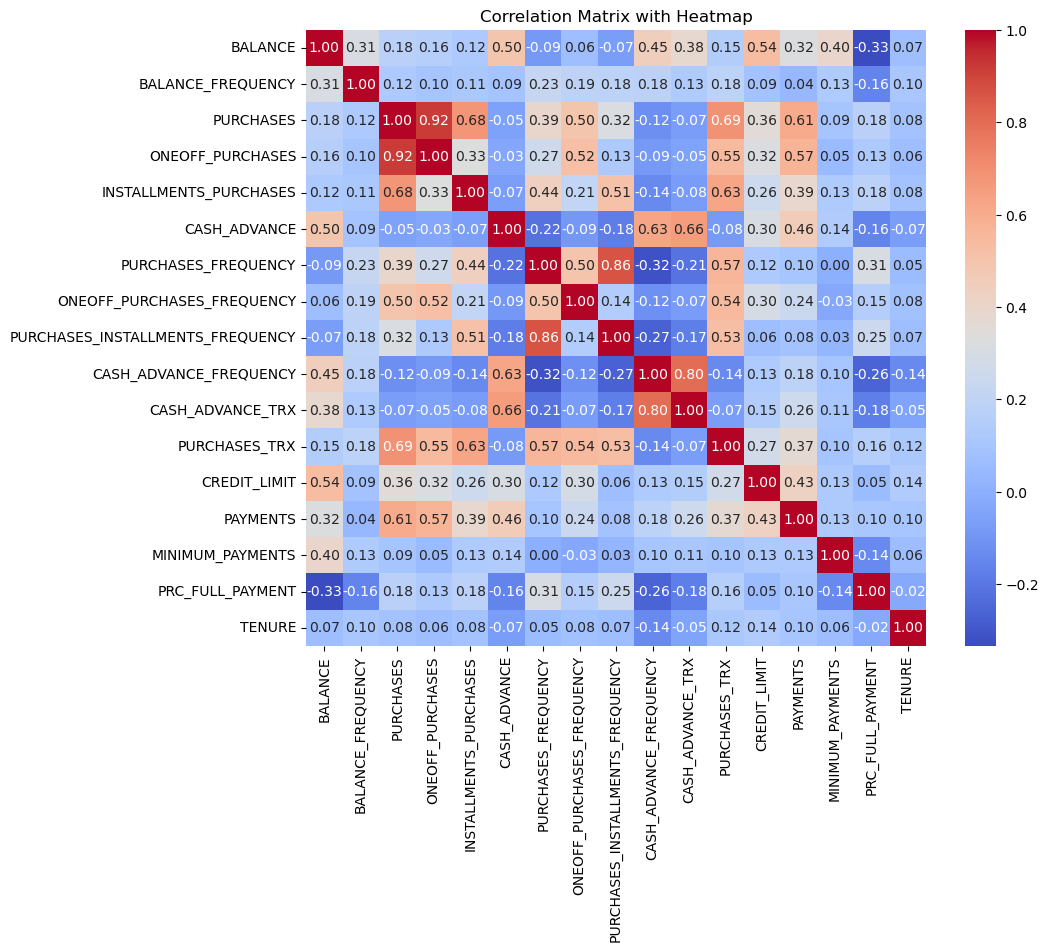

In [40]:
# Calculate the correlation matrix
corr = df_credit_card.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns)

plt.title('Correlation Matrix with Heatmap')
plt.show()

From the above graph we see the following:

1. There are several pairs of variables with strong positive correlations, as indicated by the darker red squares. For example, PURCHASES and ONEOFF_PURCHASES, PURCHASES and INSTALLMENTS_PURCHASES, and PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY have high correlation coefficients, suggesting that when one increases, the other tends to as well.
2. There are also pairs with negative correlations, indicated by the blue squares. For instance, BALANCE and PURCHASES_FREQUENCY show a moderate negative correlation, suggesting that customers with higher balances tend to purchase less frequently.
3. There is a strong correlation between CASH_ADVANCE and CASH_ADVANCE_FREQUENCY, as well as CASH_ADVANCE and CASH_ADVANCE_TRX, indicating that customers who take cash advances do so more frequently and in larger numbers of transactions.

This correlation graph will be latter used in feature selection where we can remove some features which are higly correlated.

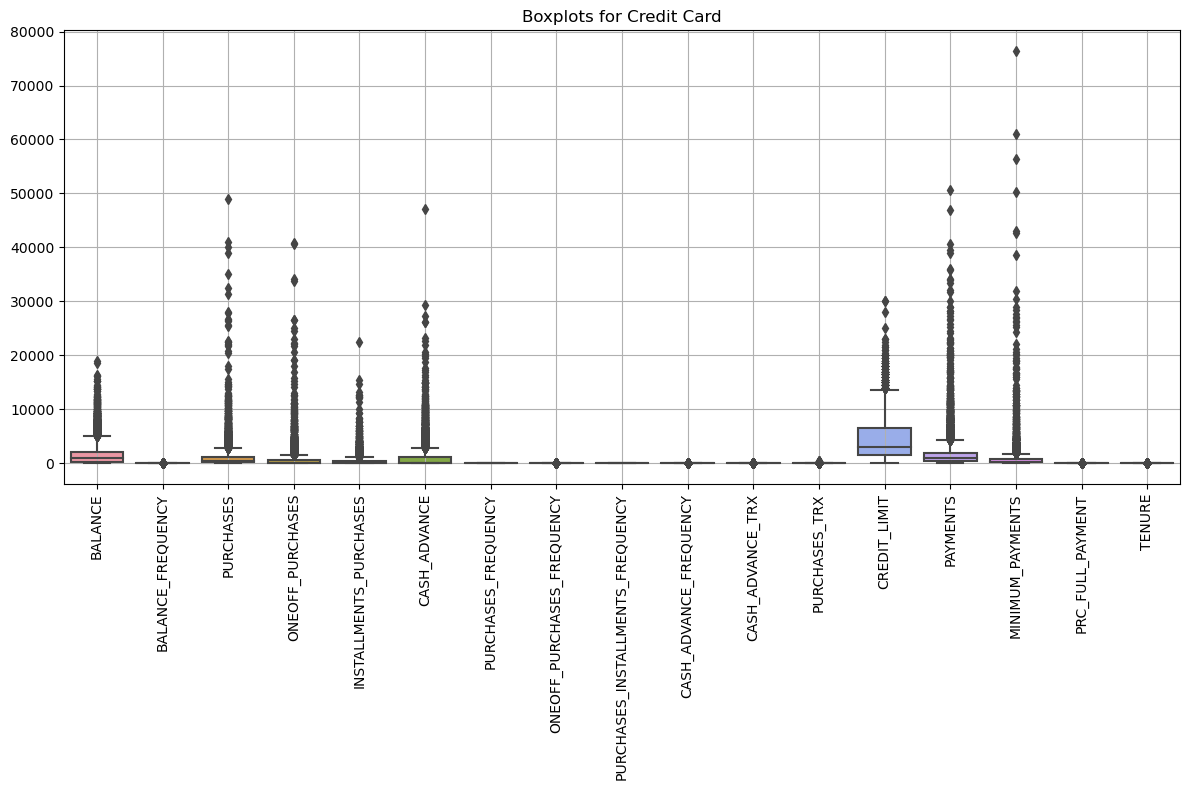

In [43]:
# Plotting boxplots for the DataFrame
plt.figure(figsize=(12, 8))  # Increase the figure size
sns.boxplot(data=df_credit_card)
plt.title('Boxplots for Credit Card')
plt.xticks(rotation=90)  # Rotate the labels to prevent overlapping
plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()

From the above boxplot we can say that Almost all categories show a significant number of outliers, indicating a lot of variation in individual credit card usage and limits. However since these outliers will contribute a lot in our modeling we will not ignore them, we will instead use a model which is robust to outliers. 

# PreProcessing

In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_credit_card)

# Saving the scaler object for later use during model deployment
# with open('standard_scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

# Convert the scaled data back to a DataFrame for display
scaled_df = pd.DataFrame(scaled_data, columns=df_credit_card.columns)
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


# Unsupervised model creation

In [13]:
# Elbow Method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_df)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

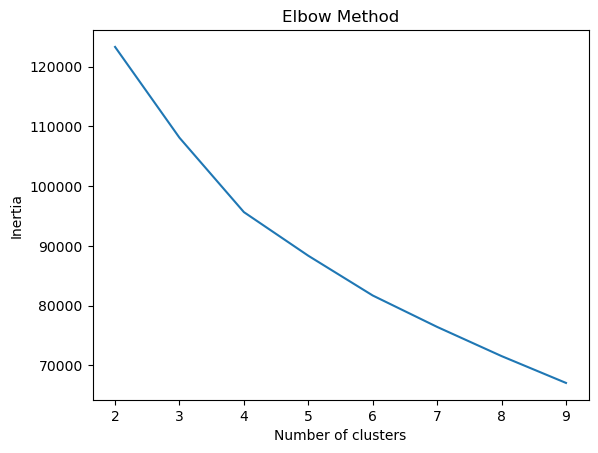

In [14]:
# Plotting the Elbow
plt.plot(range(2, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

From the plot there appears to be a change in the slope's steepness at K=3 or K=4, so any of the K could be a good starting point

In [18]:
#model building with K=3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

In [19]:
#evaluation of the clustering using silhouette
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.24754638153191033


In [17]:
#evaluation of the clustering using silhouette
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.19703675772374923


The Silhouette Score is a commonly used metric as it measures how similar an object is to its own cluster compared to other clusters.Here we choose k=3 because it is the one with higher score. I used silhouette metric because it combines ideas of cohesion (how close are the points within the same cluster) and separation (how far are the points in different clusters).

In [20]:
cluster_labels

array([0, 2, 0, ..., 0, 0, 0])

In [21]:
# Add the cluster labels to the scaled dataframe
# scaled_df['Cluster_Labels'] = cluster_labels

# Save the labeled dataframe to a csv file
# csv_file_path = 'juwizeyi-cc-labeled.csv'
# scaled_df.to_csv(csv_file_path, index=False)

In [15]:
#read a labeled saved csv 
scaled_df = pd.read_csv("juwizeyi-cc-labeled.csv")
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Labels
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181,0
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181,2
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181,0
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181,0
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181,0


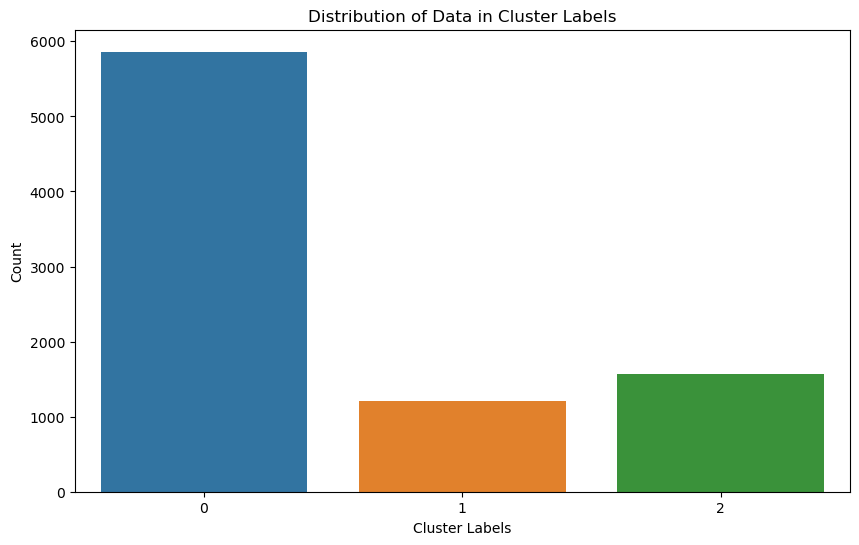

In [16]:
# Plotting the distribution of data in cluster labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster_Labels', data=scaled_df)
plt.title('Distribution of Data in Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.show()

we can see that a lot customers are segmented in cluster 0 where the cluster 1 is underrepresented in the dataset

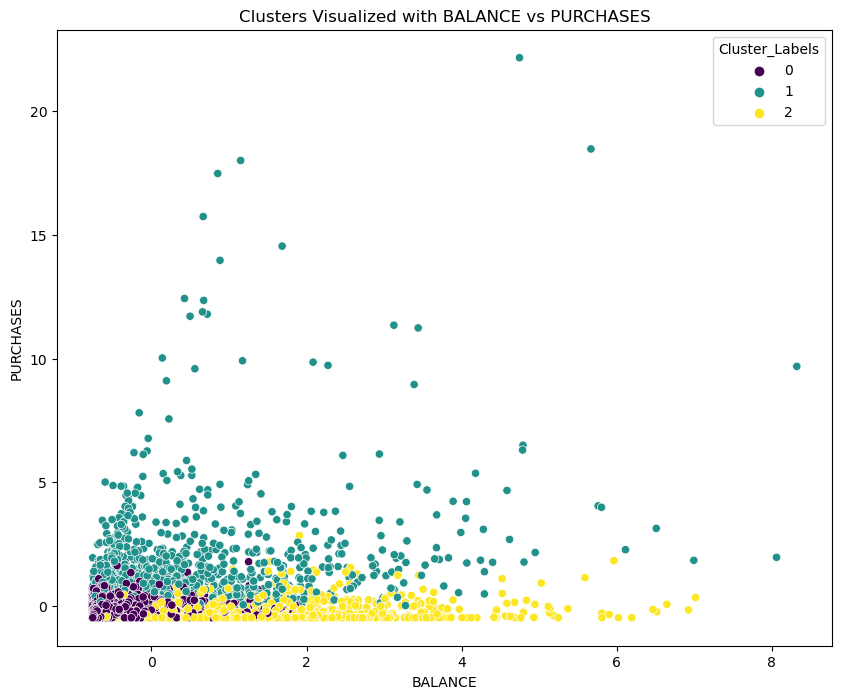

In [24]:
# Plot the clusters of groups:
# For the purpose of visualization, let's pick two features: 'BALANCE' and 'PURCHASES'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='Cluster_Labels', data=scaled_df, palette='viridis')
plt.title('Clusters Visualized with BALANCE vs PURCHASES')
plt.show()

Cluster 0 (Purple): This cluster has a high density of points concentrated at the lower end of both 'BALANCE' and 'PURCHASES'. This might indicate a group of customers with lower balances and lower purchase amounts.

Cluster 1 (Blue): This cluster is less dense and seems to have points spread out, primarily towards the higher end of 'PURCHASES' and across a range of 'BALANCE'. This could represent customers who make higher purchases regardless of their balance.

Cluster 2 (Yellow): Similar to cluster 0, cluster 2 is also concentrated at the lower end of 'PURCHASES', but it's spread across a wider range of 'BALANCE', with most data points lying in the middle range of 'BALANCE'. This might suggest these customers have moderate to high balances but tend to make smaller purchase amounts.

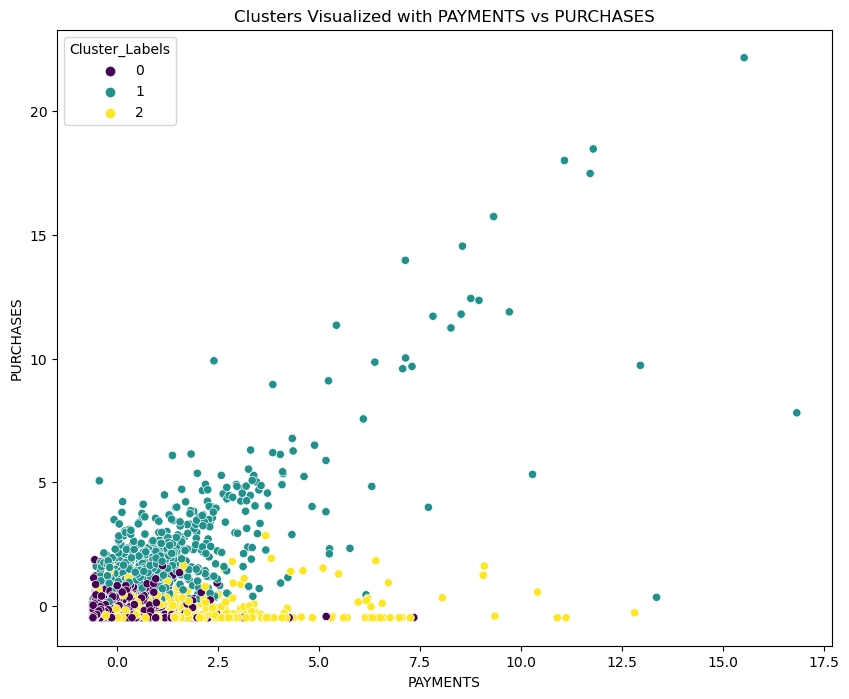

In [17]:
# Plot the clusters of groups:
# For the purpose of visualization, let's pick two features: 'BALANCE' and 'PURCHASES'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PAYMENTS', y='PURCHASES', hue='Cluster_Labels', data=scaled_df, palette='viridis')
plt.title('Clusters Visualized with PAYMENTS vs PURCHASES')
plt.show()

We can infer the same insights from this plot as well:
cluster 0(purple): being those customers who makes small purchases with less payments
cluster 1(green): Those customers who make high purchases regardless of the payments they have to make
cluter2(yellow): Those customers who tend to make small purchases with high payments

# Supervised Model Creation and Evaluation

In [18]:
def split_data(df, target_column, test_size=0.2, random_state=42):
    """
    Splits the data into features and target, then into training and testing sets.

    Parameters:
    - df: pandas DataFrame, the input data.
    - target_column: str, the name of the target variable column.
    - test_size: float, the proportion of the dataset to include in the test split.
    - random_state: int, controls the shuffling applied to the data before applying the split.

    Returns:
    - X_train: Training features
    - X_test: Testing features
    - y_train: Training target
    - y_test: Testing target
    """
    # Separate the target variable from the features
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [19]:
#call the split data function
X_train, X_test, y_train, y_test = split_data(scaled_df, 'Cluster_Labels')

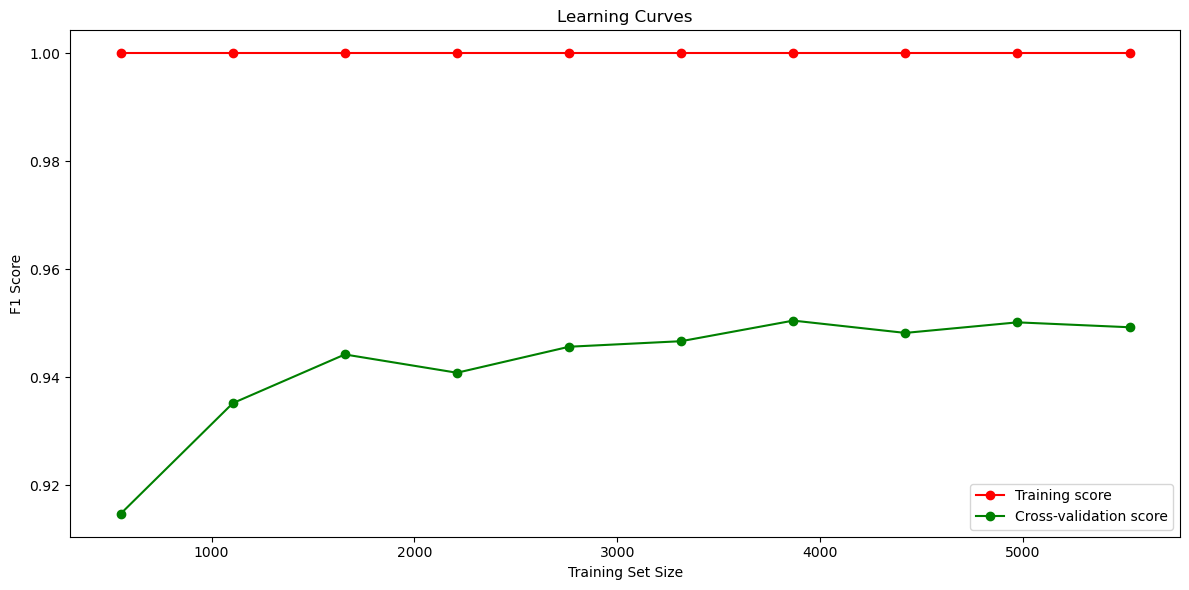

0.9492221915309917

In [29]:
# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Perform cross-validation and calculate F1 score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')

# Save the model
with open('random_forest_classifier.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Plot learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=clf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='f1_macro'
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training Set Size"), plt.ylabel("F1 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Output the mean F1 Score from cross-validation
cv_scores.mean()

I have choosen Random Forest because of its versatility. It can capture complex patterns between features and is less likely to overfit compared to individual decision trees.
From the learning curve we can see that the model shows a good ability to learn from the training data, there is an indication of overfitting since the model does not perform equally well on cross-validation data. 

# Feature selection

From the correlation graph that we visualized before we can suggest selecting features by removing those one which are higly correlated: we set a threshold of 65%:

PURCHASES and ONEOFF_PURCHASES: these features have a high correlation (0.92), which means there is a redundancy.we will remove ONEOFF_purchase because we are interested in knowing the overall spending of customers

PURCHASES and INSTALLMENTS_PURCHASES: Also highly correlated (0.68). Not as high as the previous pair. We remove INSTALLMENTS_PURCHASES.

PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY: High correlation (0.86), which could mean that one of these features can be removed. WE will still remove the PURCHASES_INSTALLMENTS_FREQUENCY because we are interested in knowing the overall purchase experience of customers

CASH_ADVANCE and CASH_ADVANCE_FREQUENCY: Moderately high correlation (0.63). Depending on the threshold, we will keep both.

CASH_ADVANCE and CASH_ADVANCE_TRX: Moderately high correlation (0.66). Similar to the above, considering the threshold we set we will remove CASH_ADVANCE_TRX because we are interested in the overall spending of customers.

PAYMENTS and MINIMUM_PAYMENTS: Correlation (0.57) is moderate, which means these variables might be providing some distinct information, we will keep both.

In [9]:
#remove features which are highly correlated
df_selected_features = scaled_df.drop(['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX'], axis=1)


In [12]:
df_selected_features.shape

(8636, 14)

We can see that after removing highly correlated features we remained with 14 features among 18 features that we had in our labled dataset

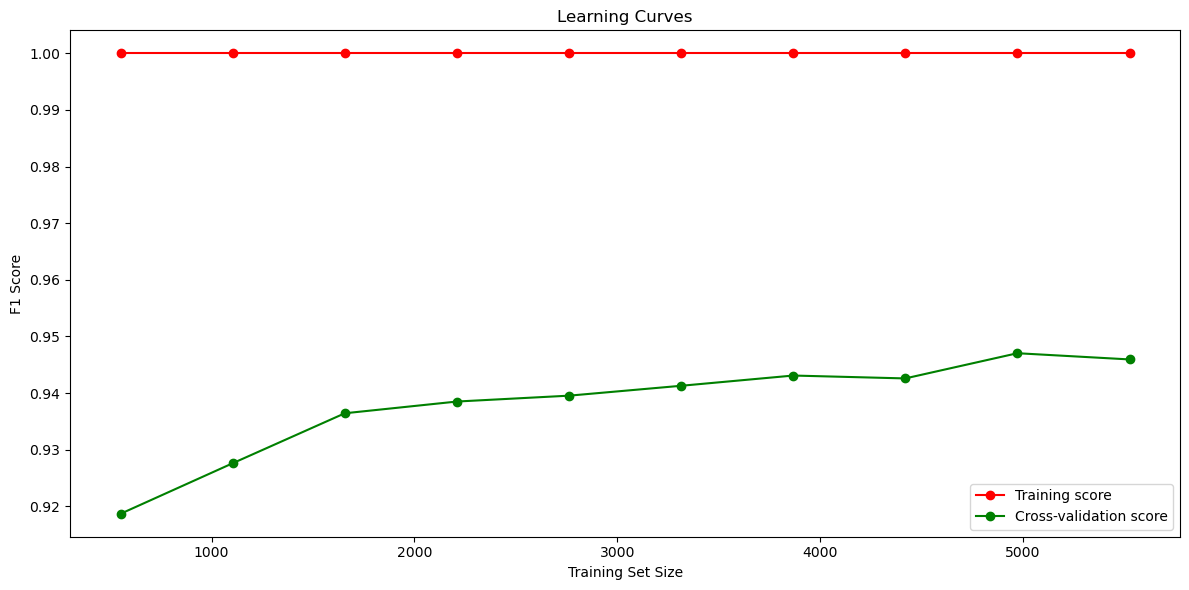

0.9459531613729322

In [15]:
# Split the data into training and testing sets for the purpose of plotting learning curves
X_train, X_test, y_train, y_test = split_data(df_selected_features, 'Cluster_Labels')
# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Perform cross-validation and calculate F1 score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')

# Save the model
with open('selected_feature_random_forest_classifier.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Plot learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=clf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='f1_macro'
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation score")

# # Draw bands for the standard deviation
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
# plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="g", alpha=0.1)

plt.title("Learning Curves")
plt.xlabel("Training Set Size"), plt.ylabel("F1 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Output the mean F1 Score from cross-validation
cv_scores.mean()

We can see that feature selection techinique of removing highly correlated features did not improve the model performance, we can try other techniques

# PCA for feature selection/Dimensionality Reduction

In [23]:
# Separate the target variable from the features
X = scaled_df.drop('Cluster_Labels', axis=1)
y = df[target_column]
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X)

#save the fitted PCA instance for later use
# joblib.dump(pca, 'pca_model.pkl')
# Print the explained variance
print(f"Explained Variance: {pca.explained_variance_ratio_}")

Explained Variance: [0.27231177 0.20374308 0.08918334 0.07573609 0.06276618 0.05712786
 0.04916188 0.04210734 0.03681697 0.03081508 0.02363804 0.0177454 ]


In [24]:
#changing x_cpa into a dataframe
X_pca_df = pd.DataFrame(X_pca)
X_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,-0.216529,-0.053144
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,-0.878351,-0.592741
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,-0.746798,0.695779
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,-0.466749,-0.119286
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,-0.194651,0.332570


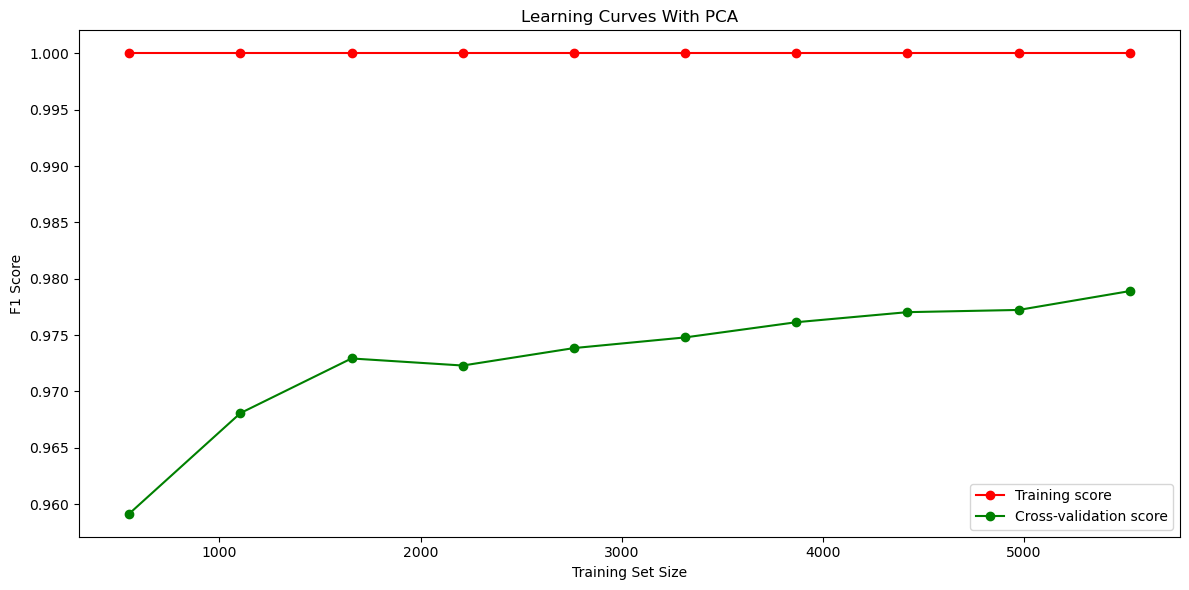

0.9789952647479796

In [29]:
# Split the data into training and testing sets for the purpose of plotting learning curves
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Initialize the classifier and use PCA
clf = RandomForestClassifier(random_state=42)

# Perform cross-validation and calculate F1 score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')

# Save the model
# with open('PCA_feature_random_forest_classifier.pkl', 'wb') as file:
#     pickle.dump(clf, file)

# Plot learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=clf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='f1_macro'
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation score")

# # Draw bands for the standard deviation
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
# plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="g", alpha=0.1)

plt.title("Learning Curves With PCA")
plt.xlabel("Training Set Size"), plt.ylabel("F1 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Output the mean F1 Score from cross-validation
cv_scores.mean()

We can see that the model performance have increased from 94.59% to 97.89% when selecting features with using PCA dimensionality redution with explained variance of 95%.So this will be our benchmark model for hyperparameter tuning in the next section 

# Hyperparameter Tuning

In [30]:
# Load the pre-saved model
model = joblib.load('saved_models/PCA_feature_random_forest_classifier.pkl')

In [31]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Save the best model
best_model = grid_search.best_estimator_
# joblib.dump(best_model, 'tuned_PCA_feature_random_forest_classifier.pkl')

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}


Used hyperparameter:

n_estimators: this hyperparameter was used because increasing the number of trees in the random forest model reduces the risk of overfitting and can improve the model's accuracy.

max_depth: This parameter helps in controlling the depth of each tree. A deeper tree can model complex patterns but might lead to overfitting. A smaller depth might prevent the model from learning complex patterns, leading to underfitting.

min_samples_split: this parameter specifies the minimum number of samples required to split an internal node in a tree. A higher value for min_samples_split can prevent the model from learning too fine details of the training data, thereby reducing the risk of overfitting.

In [15]:
# loading both tuned model and untuned model
original_model = joblib.load('saved_models/PCA_feature_random_forest_classifier.pkl')
tuned_model = joblib.load('saved_models/tuned_PCA_feature_random_forest_classifier.pkl')


In [16]:
#fiting both model with the train dataset
original_model.fit(X_train, y_train)
tuned_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)

In [17]:
# Evaluate the models on the test dataset
y_pred_orginal = original_model.predict(X_test)
y_pred_tuned = tuned_model.predict(X_test)

f1_original = f1_score(y_test, y_pred_orginal, average='macro')
f1_tuned = f1_score(y_test, y_pred_tuned, average='macro')

print(f"Original Model Score: {f1_original}")
print(f"Tuned Model Score: {f1_tuned}")

# Compare the accuracies
if f1_tuned > f1_original:
    print("The tuned model has improved in score.")
elif f1_tuned == f1_original:
    print("The tuned model has the same accuracy as the original score.")
else:
    print("The tuned model has lower accuracy than the original score.")


Original Model Score: 0.9768225761578252
Tuned Model Score: 0.9774679875272415
The tuned model has improved in score.


We can see that the model with tuned hyperparameters has a better accuracy when evaluated on test set than the model which is not tuned. We will save the model and deploy it for future use.

In [18]:
# Save the fitted model with hyperparameter tuning
with open('saved_models/tuned_PCA_random_forest_classifier.pkl', 'wb') as file:
    pickle.dump(tuned_model, file)